# Tarea 2 - Regresion Polinomial & Feature engineering

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
covid19_data = pd.read_csv('C:/Users/hevas/Downloads/covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [41]:
data_guate = covid19_data[covid19_data['Country/Region'] == 'Guatemala']
data_guate.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
123,NaN,Guatemala,15.7835,-90.2308,2020-01-22,0,0,0
385,NaN,Guatemala,15.7835,-90.2308,2020-01-23,0,0,0
647,NaN,Guatemala,15.7835,-90.2308,2020-01-24,0,0,0
909,NaN,Guatemala,15.7835,-90.2308,2020-01-25,0,0,0
1171,NaN,Guatemala,15.7835,-90.2308,2020-01-26,0,0,0


In [4]:
data_guate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 123 to 24489
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  0 non-null      object        
 1   Country/Region  94 non-null     object        
 2   Lat             94 non-null     float64       
 3   Long            94 non-null     float64       
 4   Date            94 non-null     datetime64[ns]
 5   Confirmed       94 non-null     int64         
 6   Deaths          94 non-null     int64         
 7   Recovered       94 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 6.6+ KB


In [73]:
print(min(data_guate['Date']))
print(max(data_guate['Date']))

2020-01-22 00:00:00
2020-04-24 00:00:00


In [5]:
data_guate['Confirmed'].unique()

array([  0,   1,   2,   6,   9,  12,  17,  19,  20,  21,  24,  25,  28,
        34,  36,  38,  39,  47,  50,  61,  70,  77,  87,  95, 126, 137,
       155, 156, 167, 180, 196, 214, 235, 257, 289, 294, 316, 384, 430],
      dtype=int64)

In [48]:
np.arange(1,len(data_guate))+1

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94])

In [53]:
#data_guate = data_guate.drop(['dia'], axis=1)
data_guate.insert(loc=0, column='dia', value = np.arange(len(data_guate)))
data_guate

,dia,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
123,0,NaN,Guatemala,15.7835,-90.2308,2020-01-22,0,0,0
385,1,NaN,Guatemala,15.7835,-90.2308,2020-01-23,0,0,0
647,2,NaN,Guatemala,15.7835,-90.2308,2020-01-24,0,0,0
909,3,NaN,Guatemala,15.7835,-90.2308,2020-01-25,0,0,0
1171,4,NaN,Guatemala,15.7835,-90.2308,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...,...
23441,89,NaN,Guatemala,15.7835,-90.2308,2020-04-20,289,7,21
23703,90,NaN,Guatemala,15.7835,-90.2308,2020-04-21,294,7,24
23965,91,NaN,Guatemala,15.7835,-90.2308,2020-04-22,316,8,24
24227,92,NaN,Guatemala,15.7835,-90.2308,2020-04-23,384,11,30


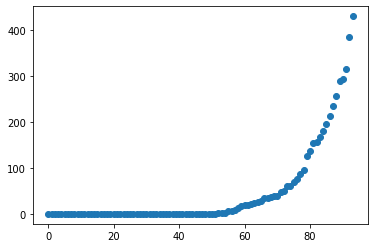

In [62]:
from matplotlib import pyplot as plt
 
x = data_guate['dia'].values.reshape(-1, 1)
y = data_guate['Confirmed'].values.reshape(-1, 1)
plt.scatter(x,y)

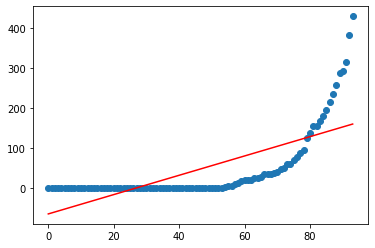

In [63]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

In [65]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 63.91948001125908
R2: 0.5136334155291126


In [66]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print(x)
print(x_poly)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]
 [78]
 [79]
 [80]
 [81]
 [82]
 [83]
 [84]
 [85]
 [86]
 [87]
 [88]
 [89]
 [90]
 [91]
 [92]
 [93]]
[[0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00]
 [2.000e+00 4.000e+00]
 [3.000e+00 9.000e+00]
 [4.000e+00 1.600e+01]
 [5.000e+00 2.500e+01]
 [6.000e+00 3.600e+01]
 [7.000e+00 4.900e+01]
 [8.000e+00 6.400e+01]
 [9.000e+00 8.100e+01]
 [1.000e+01 1.000e+02]
 [1.100e+01 1.210e+02]
 [1.200e+01 1.440e+02]
 [1.300e+01 1.690e+02]
 [1.400e+01 1.960e+02]
 [1.500e+01 2.250e+02]
 [1.600e+01 2.560e+02]
 [1.700e+01 2.890e+02]
 [1.800e+01 3.240e+02

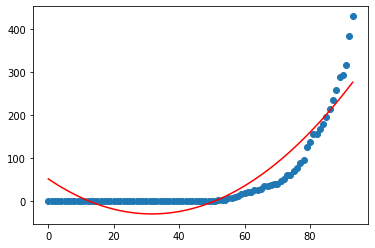

RMSE: 34.7481480284037
R2: 0.8562656436123857


In [67]:
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

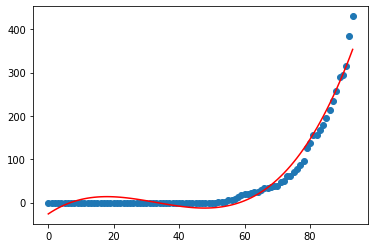

RMSE: 15.428763856082453
R2: 0.9716626309134612


In [68]:
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)
 
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

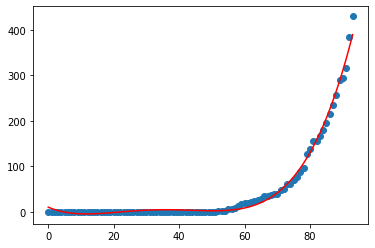

RMSE: 7.699653057734583
R2: 0.9929426838073185


In [69]:
poly = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly.fit_transform(x)
 
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [14]:
data = pd.read_csv('C:/Users/hevas/Downloads/regresion_polinomial/winequality-red.csv')

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
correlacion = data.corr()
correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


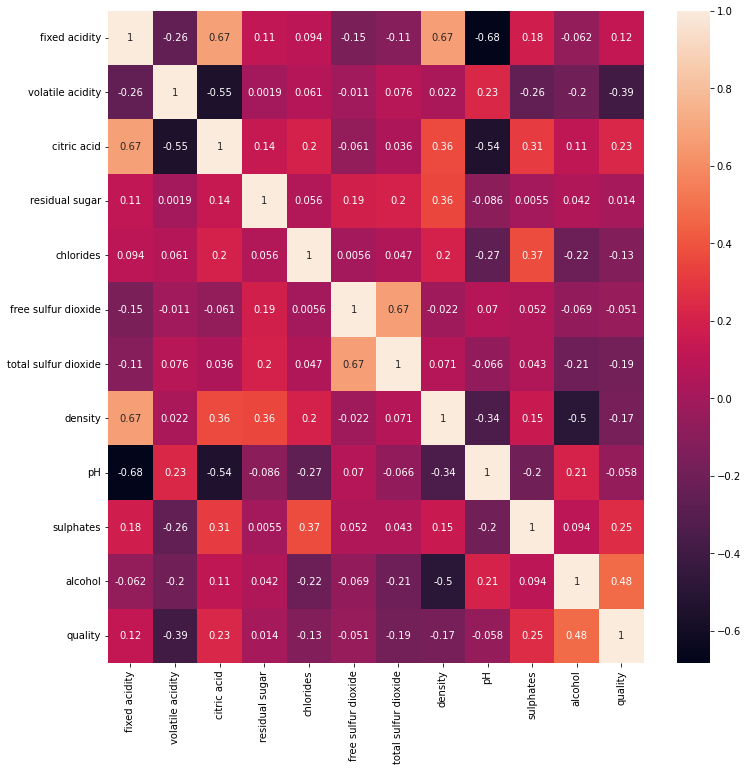

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(correlacion,annot=True)
plt.show()

<AxesSubplot:>

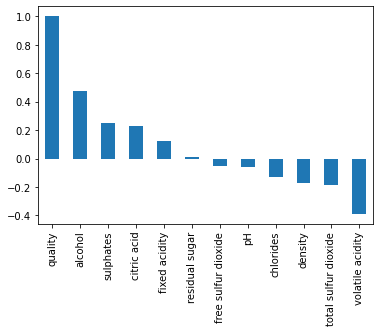

In [13]:
corr = data.corr()['quality'].sort_values(ascending=False)
corr.plot(kind='bar')

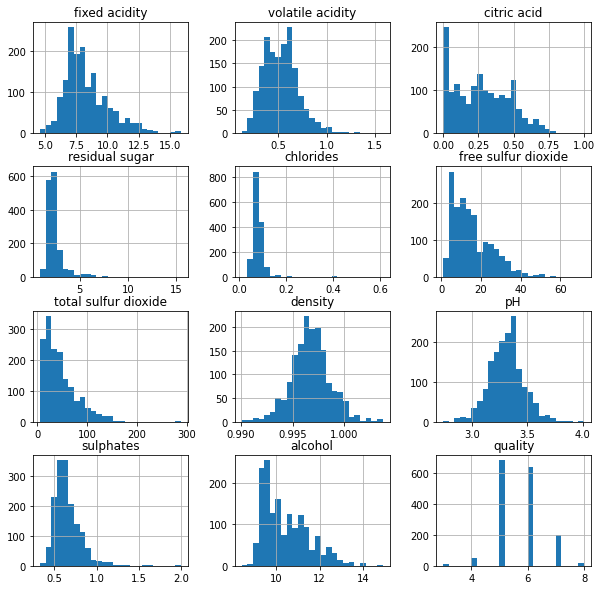

In [14]:
data.hist(bins=25,figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

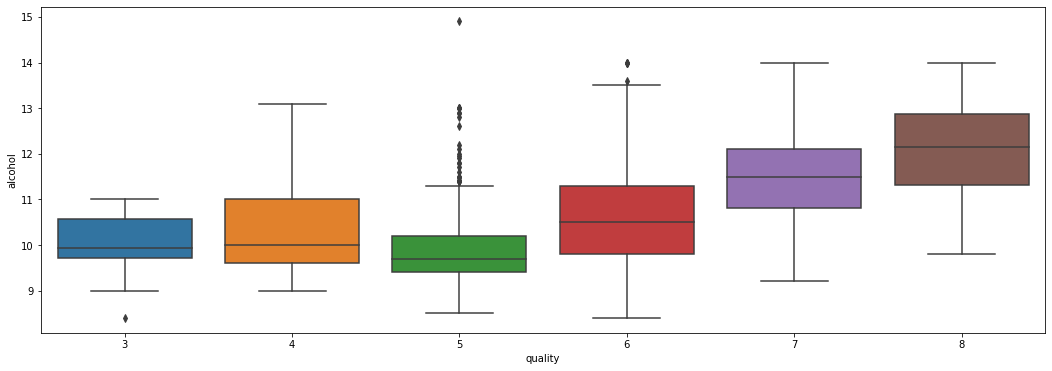

In [15]:
plt.figure(figsize=(18,6))
sns.boxplot(x="quality",y="alcohol", data=data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

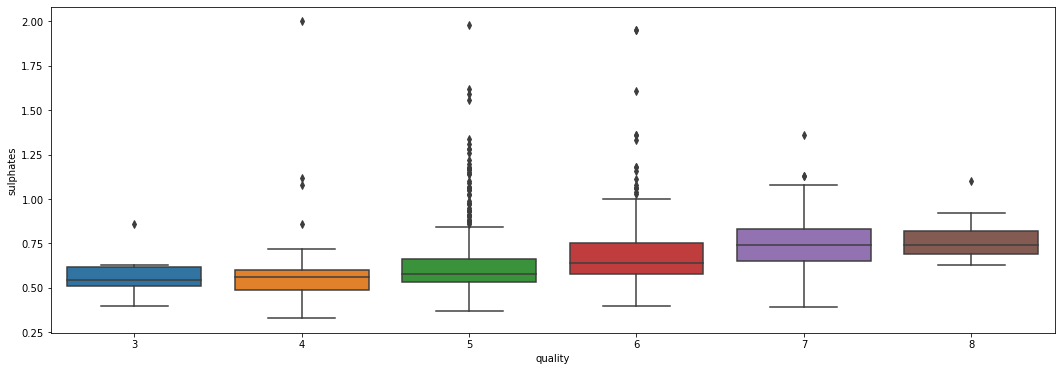

In [16]:
plt.figure(figsize=(18,6))
sns.boxplot(x="quality",y="sulphates", data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

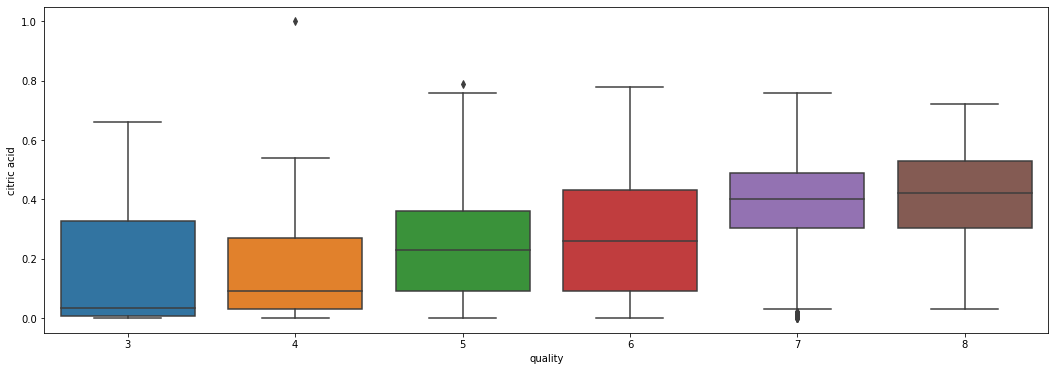

In [17]:
plt.figure(figsize=(18,6))
sns.boxplot(x="quality",y="citric acid", data=data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

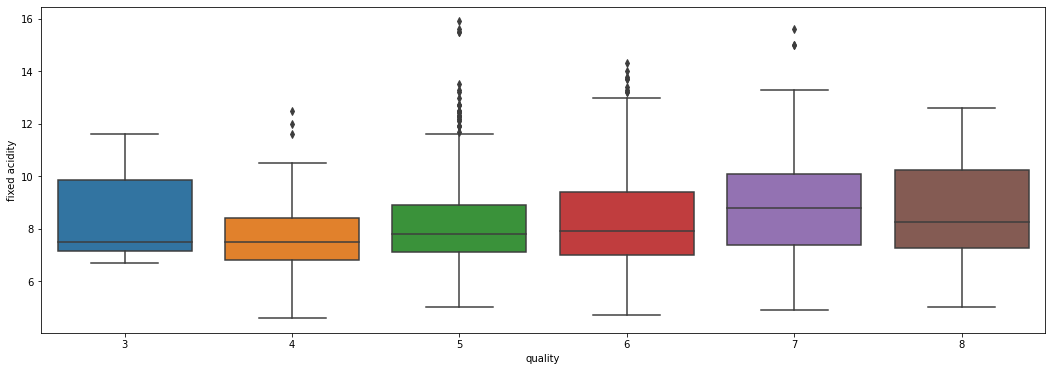

In [18]:
plt.figure(figsize=(18,6))
sns.boxplot(x="quality",y="fixed acidity", data=data)

In [15]:
features = ['alcohol','sulphates']
target = ['quality']

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = linear_model.LinearRegression()
model = model.fit(y_train, X_train)
predicted_data = model.predict(y_test)
predicted_data = np.round_(predicted_data)

print (mean_squared_error(X_test,predicted_data))


print (predicted_data)

0.6656869027777782
[[10.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [ 9.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [ 9.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [ 9.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [ 9.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [ 9.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = PolynomialFeatures(degree= 4)
y_ = model.fit_transform(y)
y_test_ = model.fit_transform(y_test)


lg = LinearRegression()
lg.fit(y_,X)
predicted_data = lg.predict(y_test_)
predicted_data = np.round_(predicted_data)

print (mean_squared_error(X_test,predicted_data))

print (predicted_data)

0.5359644444444452
[[11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [12.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [12.  1.]
 [12.  1.]
 [11.  1.]
 [10.  1.]
 [12.  1.]
 [10.  1.]
 [12.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [12.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [12.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [10.  1.]
 [10.  1.]
 [12.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [11.  1.]
 [12.  1.]
 [11.  1.]
 [10.  1.]
 [12.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [10.  1.]
 [10.  1.]
 [10.  1.]
 [11.  1.]
 [11.  1.]
 [10.  1.]
 [11.  1.]
 [

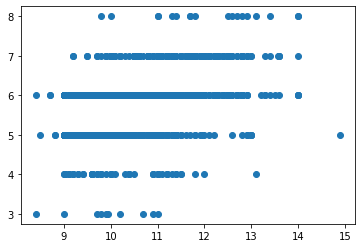

In [34]:
from matplotlib import pyplot as plt
 
x = data['alcohol'].values.reshape(-1, 1)
y = data['quality'].values.reshape(-1, 1)
plt.scatter(x,y)

In [39]:
prueba = data[['alcohol','sulphates']]
prueba = np.array(prueba).reshape(-1, 1)

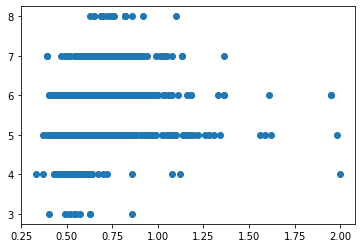

In [33]:
from matplotlib import pyplot as plt
 
x = data['sulphates'].values.reshape(-1, 1)
y = data['quality'].values.reshape(-1, 1)
plt.scatter(x,y)

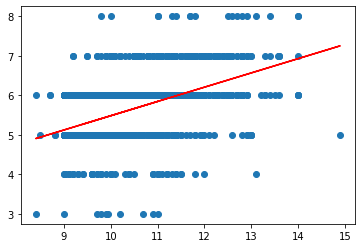

In [41]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 0.7099183232396928
R2: 0.22673436811275494


In [44]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print(x)
print(x_poly)

[[ 9.4]
 [ 9.8]
 [ 9.8]
 ...
 [11. ]
 [10.2]
 [11. ]]
[[  9.4   88.36]
 [  9.8   96.04]
 [  9.8   96.04]
 ...
 [ 11.   121.  ]
 [ 10.2  104.04]
 [ 11.   121.  ]]


In [45]:
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
#plt.scatter(x, y)
#plt.plot(x, y_pred, color='r')
#plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 0.7093578590815461
R2: 0.22795483695382468


In [46]:
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)
 
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
#plt.scatter(x, y)
#plt.plot(x, y_pred, color='r')
#plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 0.706512774695159
R2: 0.23413543732332176


In [47]:
poly = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly.fit_transform(x)
 
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
 
#plt.scatter(x, y)
#plt.plot(x, y_pred, color='r')
#plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 0.7065062489985948
R2: 0.2341495850552333
